## NJSLA Spring 25 ELA Analysis 

Analysis of the ELA results of the Spring 25 NJSLA

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing dataset
df_ela = pd.read_excel(r"S:\ASSESSMENTS\NJSLA 2025\NJSLA 2025 ELA Math Summative Record File.xlsx")

In [3]:
# filtering to return ELA TestCodes
df_ela = df_ela[df_ela['TestCode'].isin(['ELA03', 'ELA04', 'ELA05', 'ELA06', 'ELA07','ELA08', 'ELA09'])]

In [4]:
#filtering for valid test attempts
df_ela = df_ela[df_ela['TestStatus']=='Attempt']

In [5]:
subject = 'ELA'

In [6]:
df_ela.shape

(2889, 205)

In [7]:
# test code QA
df_ela['TestCode'].unique()

array(['ELA09', 'ELA07', 'ELA06', 'ELA08', 'ELA05', 'ELA04', 'ELA03'],
      dtype=object)

In [8]:
# min and max scale scores by test performance level
df_ela.groupby('TestPerformanceLevel')['TestScaleScore'].agg(['min','max'])

,min,max
TestPerformanceLevel,,
1.0,650.0,699.0
2.0,700.0,724.0
3.0,725.0,749.0
4.0,750.0,809.0
5.0,785.0,850.0


In [9]:
# function for proficiency
def proficient (row):
    if row['TestScaleScore'] >= 750:
        return 1
    elif row['TestScaleScore'] < 750:
        return 0

df_ela['proficient'] = df_ela.apply(proficient, axis = 1)

### Overall Proficiency

In [10]:
# Test performance level metrics
overall_performance_levels = df_ela['TestPerformanceLevel'].value_counts(normalize = True)
overall_performance_levels = overall_performance_levels.reset_index()
overall_performance_levels = overall_performance_levels.sort_values(by = 'TestPerformanceLevel').reset_index(drop = True)

#overall proficiency
overall_proficiency = pd.DataFrame({'Outcome':'Proficient','Proficiency %':df_ela['proficient'].mean()}, index = [0])

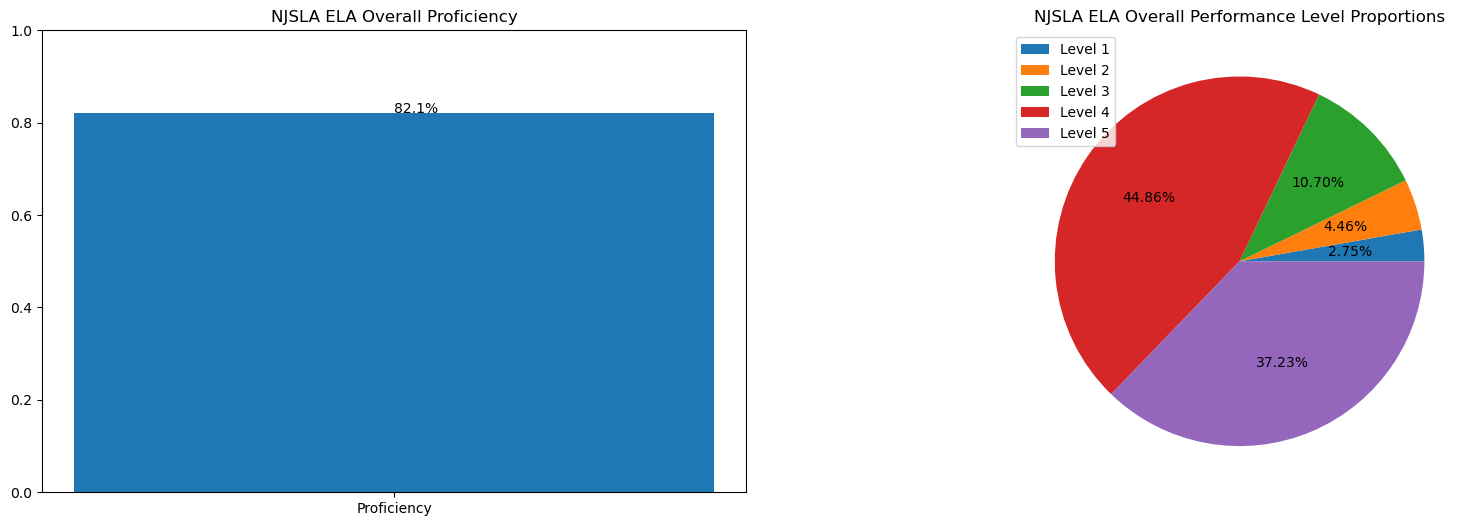

In [11]:
# plotting data
fig,ax = plt.subplots(nrows = 1, ncols =2, figsize = (20,6))
ax[1].pie (x = 'proportion', data = overall_performance_levels, autopct = '%1.2f%%' )
ax[0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = overall_proficiency)

#labeling
ax[0].set_title(f"NJSLA {subject} Overall Proficiency")
ax[1].set_title(f"NJSLA {subject} Overall Performance Level Proportions")
ax[1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')
ax[0].set_ylim(0,1)#--> setting y axis limit

for i,v in enumerate(overall_proficiency['Proficiency %']):
    ax[0].text(i,v,f"{v:.1%}")

plt.show()

### Proficiency Comparision **General Education** and **IEP** 

In [12]:
# proficiency excluding IEP
gen_ed_test_performance = df_ela[df_ela['StudentWithDisabilities']!= 'IEP']['TestPerformanceLevel'].value_counts(normalize = True)
gen_ed_test_performance = gen_ed_test_performance.reset_index()
gen_ed_test_performance = gen_ed_test_performance.sort_values(by = 'TestPerformanceLevel').reset_index(drop = True)

# proficiency excluding IEP
gen_ed_proficiency = pd.DataFrame({'Outcome':'Gen Ed Proficient',
                                   'Proficiency %':df_ela[df_ela['StudentWithDisabilities']!= 'IEP']['proficient'].mean()}, index = [0])


# proficiency exclusively IEP
iep_test_performance = df_ela[df_ela['StudentWithDisabilities']=='IEP']['TestPerformanceLevel'].value_counts(normalize = True)
iep_test_performance = iep_test_performance.reset_index()
iep_test_performance = iep_test_performance.sort_values(by = 'TestPerformanceLevel' ).reset_index()

# proficiency exclusively IEP
iep_proficiency = pd.DataFrame({'Outcome':'Gen Ed Proficient',
                                 'Proficiency %':df_ela[df_ela['StudentWithDisabilities']== 'IEP']['proficient'].mean()}, index = [0])


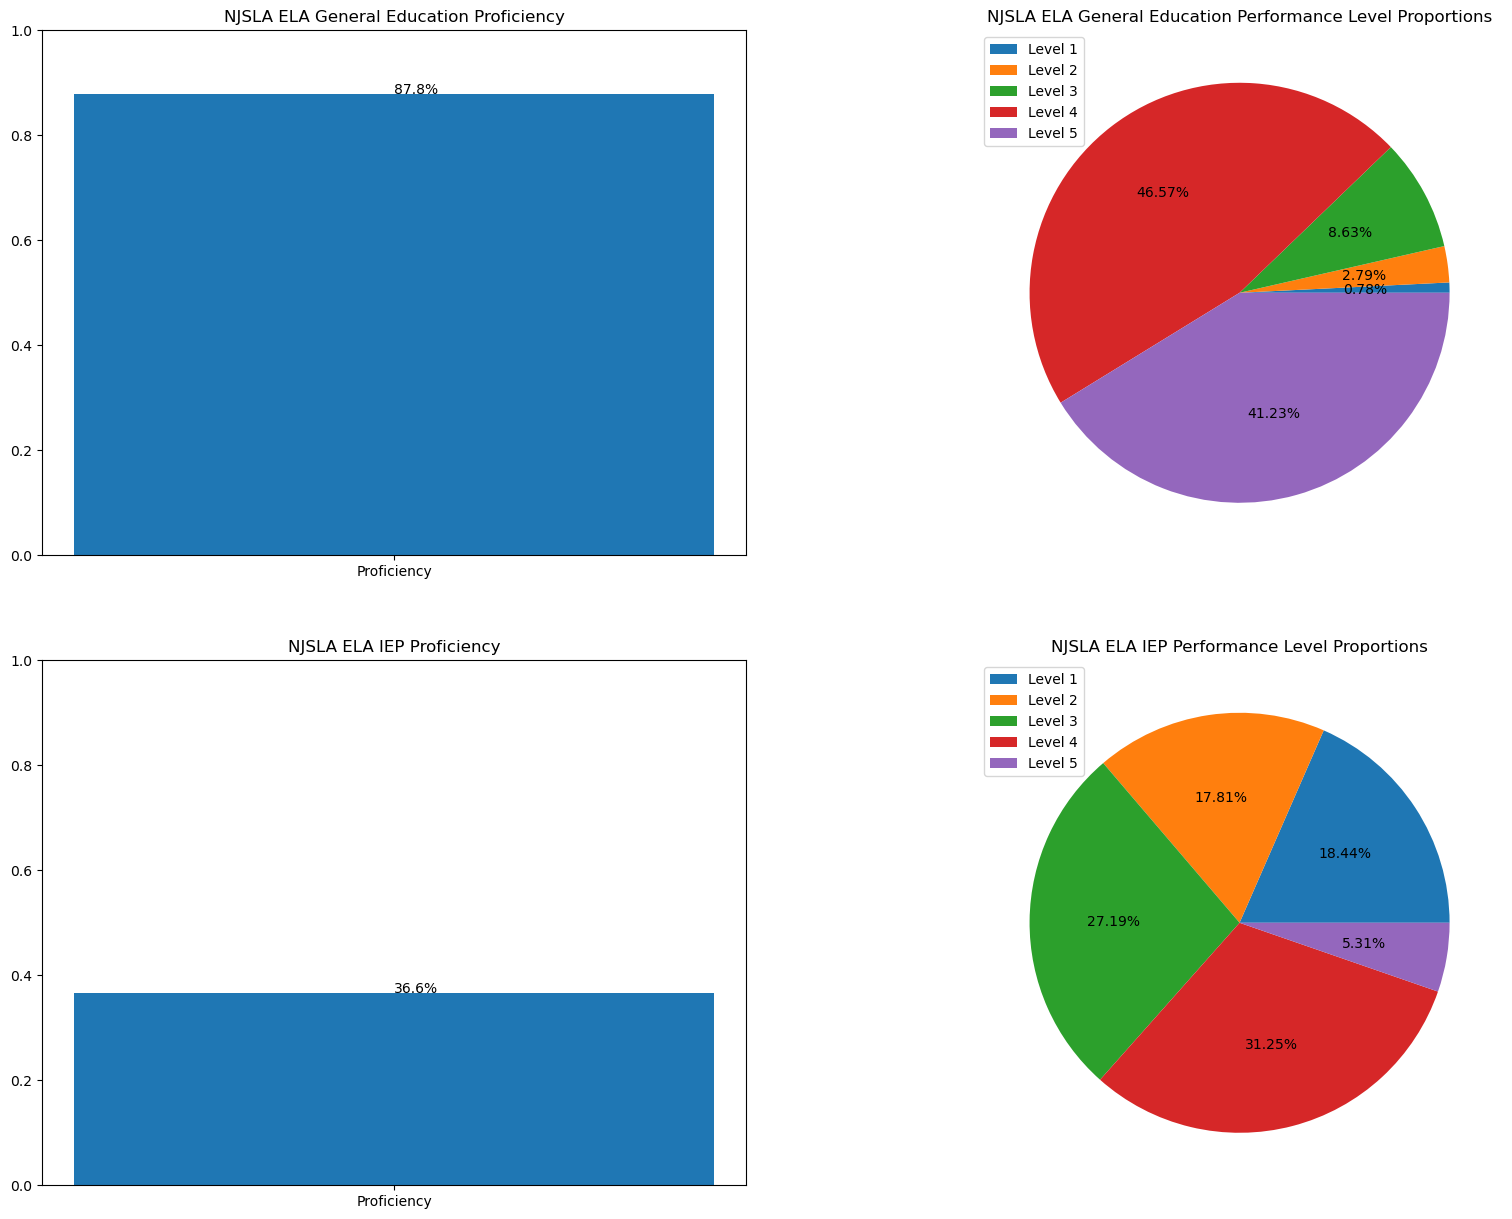

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

# plotting general education data
ax[0,1].pie (x = 'proportion', data = gen_ed_test_performance, autopct = '%1.2f%%' )
ax[0,0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = gen_ed_proficiency)


# labeling
ax[0,0].set_title(f"NJSLA {subject} General Education Proficiency")
ax[0,1].set_title(f"NJSLA {subject} General Education Performance Level Proportions")

ax[0,0].set_ylim(0,1)
for i,v in enumerate(gen_ed_proficiency['Proficiency %']):
    ax[0,0].text(i,v,f"{v:.1%}")

ax[0,1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')


# plotting IEP data
ax[1,1].pie (x = 'proportion', data = iep_test_performance, autopct = '%1.2f%%' )
ax[1,0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = iep_proficiency)


# labeling
ax[1,0].set_title(f"NJSLA {subject} IEP Proficiency")
ax[1,1].set_title(f"NJSLA {subject} IEP Performance Level Proportions")

ax[1,0].set_ylim(0,1)
for i,v in enumerate(iep_proficiency['Proficiency %']):
    ax[1,0].text(i,v,f"{v:.1%}")

ax[1,1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')


plt.show()


### Proficiency by Race

In [14]:
# function to create race column
def race (row):
    if row['TwoOrMoreRaces'] == 'Y':
        return 'Multi'
    elif row['HispanicOrLatinoEthnicity'] == 'Y':
        return 'Hispanic'
    elif row['AmericanIndianOrAlaskaNative '] == 'Y':
        return 'American Indian Or Alaska Native'
    elif row['Asian'] == 'Y':
        return 'Asian'
    elif row['BlackOrAfricanAmerican'] == 'Y':
        return 'Black'
    elif row['NativeHawaiianOrOtherPacificIslander'] == 'Y':
        return 'Native Hawaiian Or Other Pacific Islander'
    elif row['White'] == 'Y':
        return 'White'
        
df_ela['Race'] = df_ela.apply(race, axis = 1)

In [15]:
race = df_ela['Race'].value_counts().reset_index()
race

,Race,count
0,White,1683
1,Asian,625
2,Multi,290
3,Hispanic,255
4,Black,35
5,Native Hawaiian Or Other Pacific Islander,1


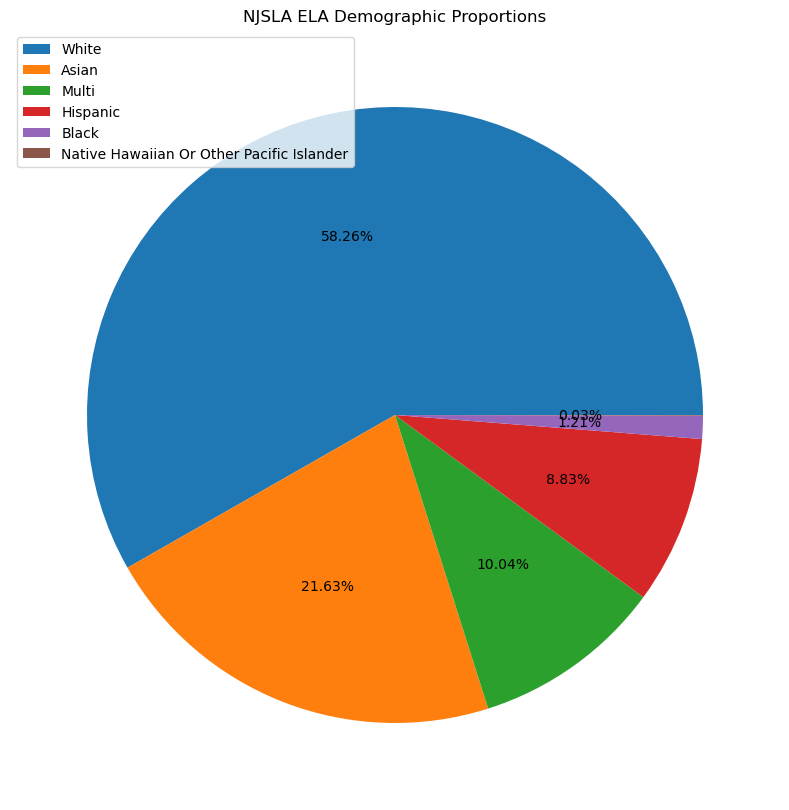

In [16]:
plt.figure(figsize = (15,10))
plt.pie(x = 'count', data = race, autopct = '%1.2f%%')
plt.legend(['White','Asian','Multi', 'Hispanic', 'Black','Native Hawaiian Or Other Pacific Islander'], loc = 'upper left')
plt.title(f"NJSLA {subject} Demographic Proportions")
plt.show()

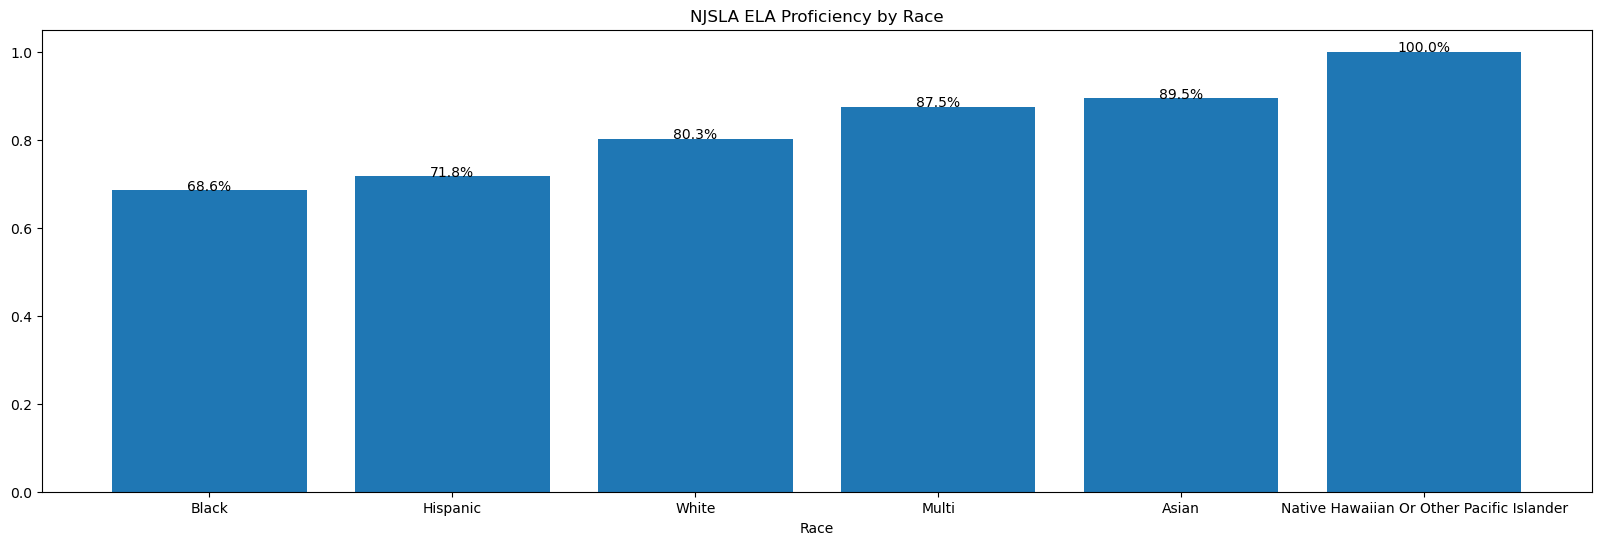

In [17]:
# proficiency by race
race_proficient = df_ela.groupby('Race')['proficient'].mean().sort_values().reset_index()

# plotting data
plt.figure(figsize = (20,6))
plt.bar(x = 'Race',height = 'proficient',data = race_proficient)

#labels
plt.title(f"NJSLA {subject} Proficiency by Race")
plt.xlabel('Race')
for i,v in enumerate(race_proficient['proficient']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')

In [18]:
# stacked bar graph
race_total = df_ela['Race'].value_counts().reset_index()
race_total.rename(columns = {'count':'total'}, inplace = True)
race_not_proficient = df_ela[df_ela['proficient'] == 0]['Race'].value_counts().reset_index()
race_not_proficient.rename(columns = {'count':'not proficient count'}, inplace = True)

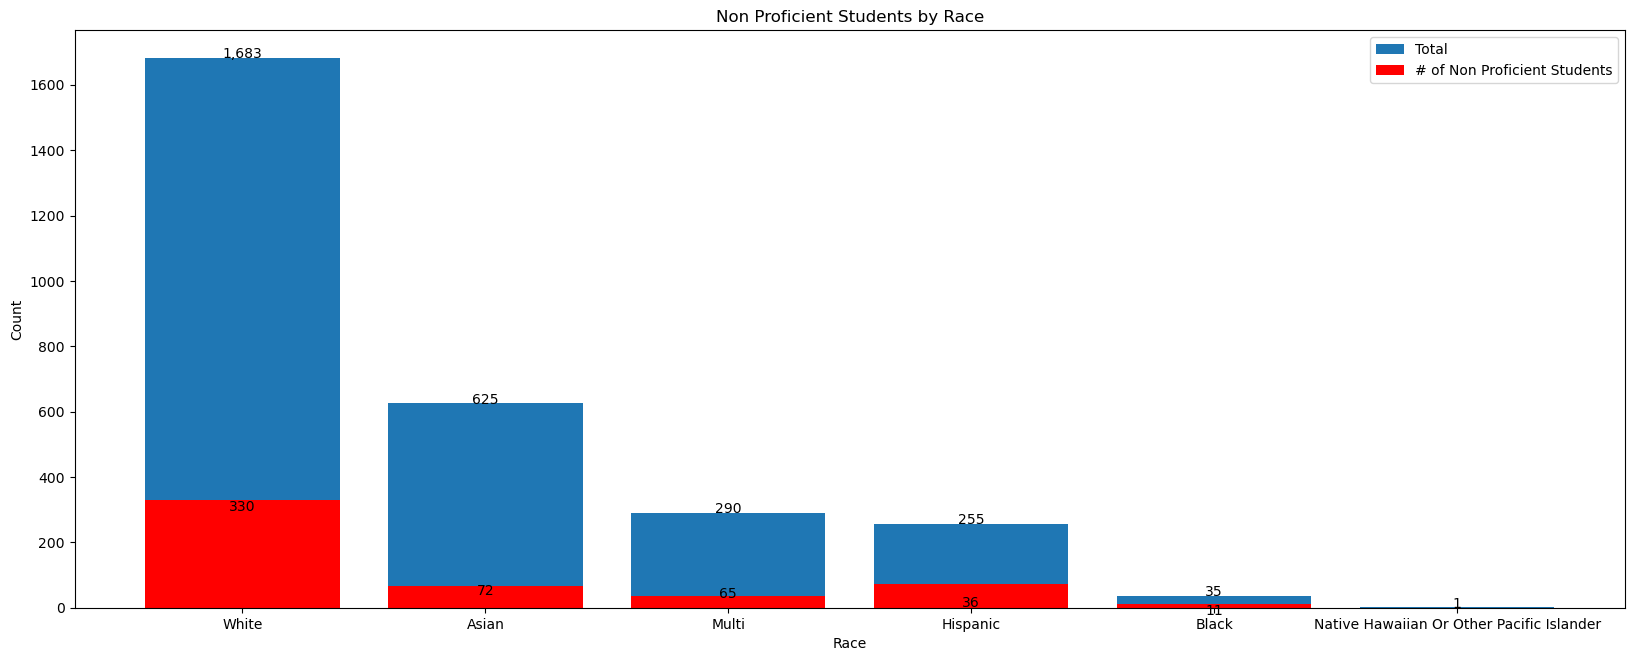

In [19]:
# plotting data
plt.figure(figsize=(20,7.5)) #--> creating a figure

#plotting data - total data and not proficient data by race
plt.bar(x = 'Race', height = 'total', data = race_total)
plt.bar(x = 'Race', height = 'not proficient count', color = 'red',data = race_not_proficient)

#adding labels to bar graphs
for i,v in enumerate(race_not_proficient['not proficient count']):#--> not proficient
    plt.text(i,v,str(v), ha = 'center', va = 'top')

for i,v in enumerate(race_total['total']): #--> total
    plt.text(i,v,f"{v:,}", ha = 'center')

# labeling plots
plt.title('Non Proficient Students by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(['Total','# of Non Proficient Students'])

# display
plt.show()

In [20]:
# data cleaning 

# creating proportions
race['%'] = race['count']/race['count'].sum()
race_not_proficient['%'] = race_not_proficient['not proficient count']/race_not_proficient['not proficient count'].sum()

# sorting data
race = race.sort_values(by = 'Race').reset_index(drop = True)
race_not_proficient = race_not_proficient.sort_values(by = 'Race').reset_index(drop = True)

# adding data for Native Hawaiian Or Other Pacific Islander
native_hawaiian = pd.DataFrame({'Race':'Native Hawaiian Or Other Pacific Islander','not proficient count':0,'%':0}, index =[4])
race_not_proficient = pd.concat([race_not_proficient,native_hawaiian])

race_not_proficient = race_not_proficient.sort_values(by = 'Race').reset_index(drop = True)


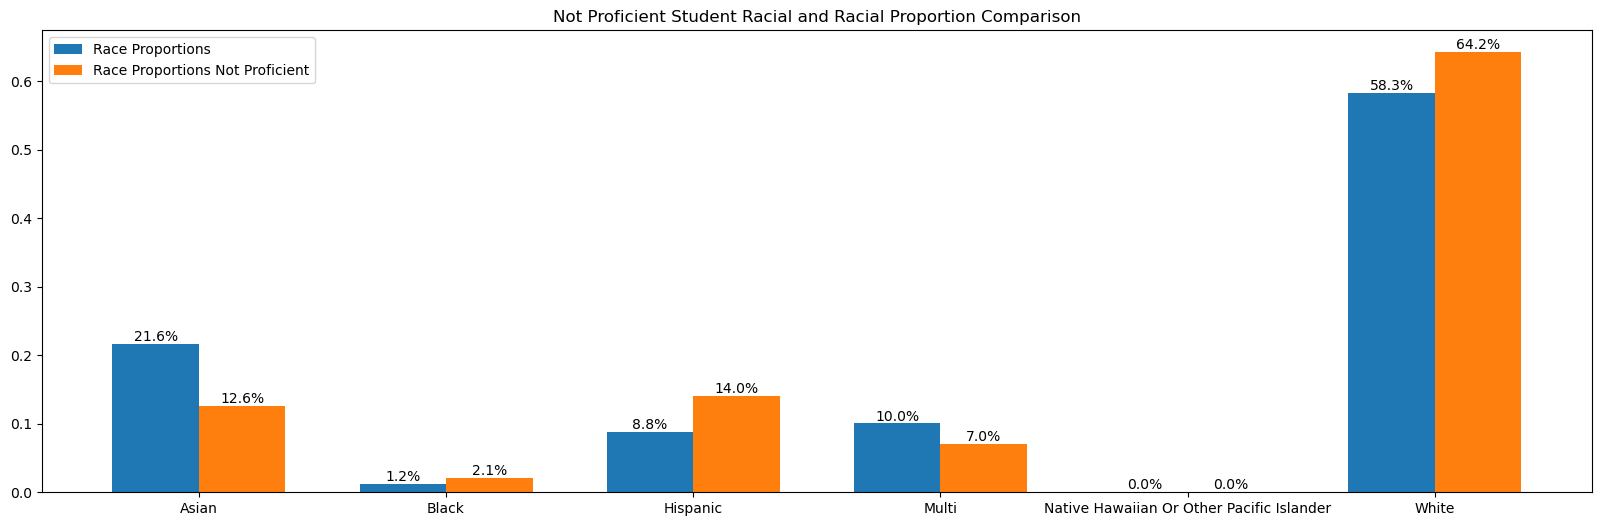

In [21]:
# creating grouped bar chart for race and proportion of r

labels = race_not_proficient['Race'].to_list() #--> labels
race_proportions = race['%'].to_list() #--> group values
race_proportions_not_proficient = race_not_proficient['%'].to_list()#--> group values

#label locations
x = np.arange(len(labels)) #--> label locations
width = 0.35 #--> width of bars

# creating subplot
fig,ax = plt.subplots(figsize = (20,6))

#plotting data
rects1 = ax.bar(x-width/2, race_proportions,width, label = 'Race Proportions') #--> plotting one  bar that is half the width of the bar at an off center position
rects2 = ax.bar(x+width/2, race_proportions_not_proficient, width, label = 'Race Proportions Not Proficient')

ax.bar_label(rects1, fmt = '{:.1%}') #--> adding labels to bar graph
ax.bar_label(rects2,fmt = '{:.1%}') #--> adding labels to bar graph

ax.set_title('Not Proficient Student Racial and Racial Proportion Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [22]:
print(f"White, Hispanic, and Black Students were over represented in the racial proportions of students that were not proficient on the {subject} section of the NJSLA compared to the overall racial proportions of the students who took the NJSLA.")

White, Hispanic, and Black Students were over represented in the racial proportions of students that were not proficient on the ELA section of the NJSLA compared to the overall racial proportions of the students who took the NJSLA.


## Test Scale Score Distribution

In [23]:
df_ela['TestScaleScore'].describe()   

count    2869.000000
mean      780.163123
std        36.923550
min       650.000000
25%       757.000000
50%       781.000000
75%       805.000000
max       850.000000
Name: TestScaleScore, dtype: float64

In [24]:
# statistical metrics
mean = df_ela['TestScaleScore'].mean()
median = df_ela['TestScaleScore'].median()
q3 = df_ela['TestScaleScore'].quantile(.75) #--> 75th percentile
q1 = df_ela['TestScaleScore'].quantile(.25) #--> 25th percentile
iqr = q3-q1 # IQR

# finding outliers
outlier_upper = q3 + (1.5 * iqr) 
outlier_lower = q1 - (1.5 * iqr)

print(f"An outlier on the NJSLA in {subject} is a Test Scale Score less than or equal to {outlier_lower}",
      f"There are {df_ela[df_ela['TestScaleScore']<= outlier_lower].shape[0]} outliers in the dataset.")

An outlier on the NJSLA in ELA is a Test Scale Score less than or equal to 685.0 There are 43 outliers in the dataset.


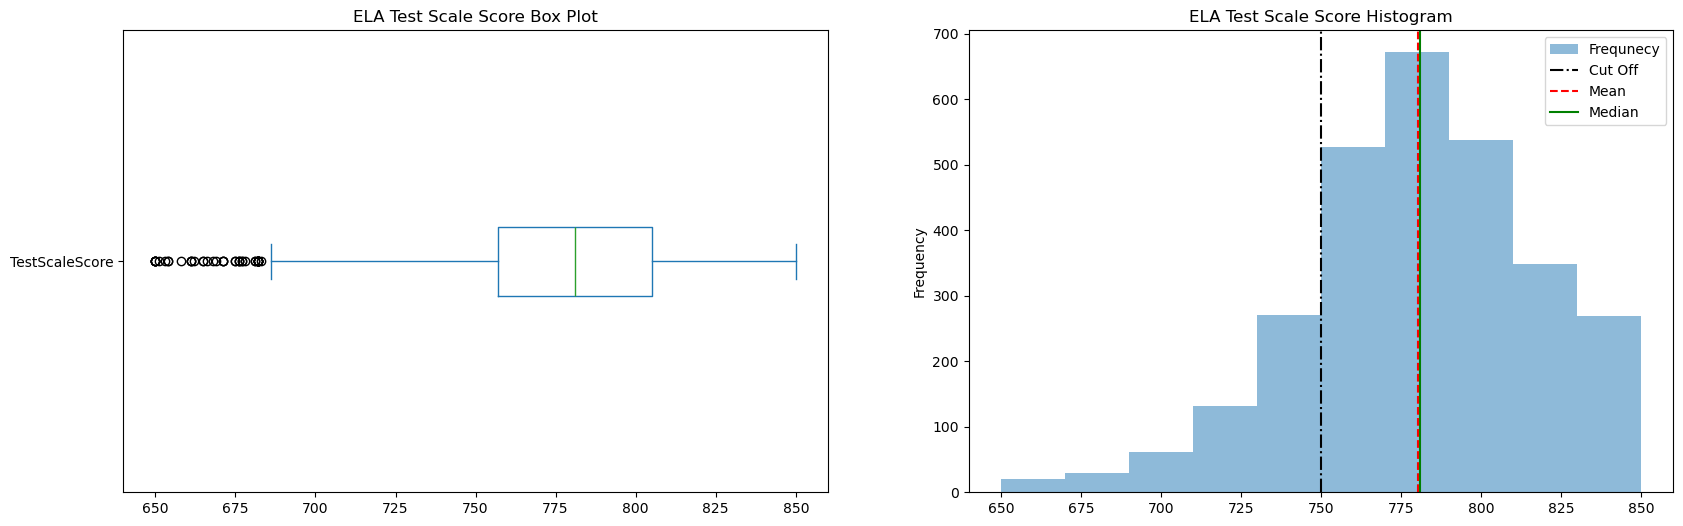

In [25]:
# plotting Test Scale Score Distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

df_ela['TestScaleScore'].plot(kind = 'box', vert = False, title = f'{subject} Test Scale Score Box Plot', ax = ax[0])
df_ela['TestScaleScore'].plot(kind = 'hist', title = f'{subject} Test Scale Score Histogram', ax = ax[1], alpha = .5)

ax[1].axvline(x = 750, linestyle = '-.', color = 'black')
ax[1].axvline(x = mean, linestyle = '--', color = 'red')
ax[1].axvline(x = median, linestyle = '-', color = 'green')

plt.legend(['Frequnecy','Cut Off','Mean','Median'])

plt.show()

#### Outliers

In [26]:
outliers = df_ela[df_ela['TestScaleScore']<= outlier_lower]

outliers['TestScaleScore'].describe()

count     43.000000
mean     668.697674
std       11.993123
min      650.000000
25%      659.500000
50%      671.000000
75%      681.000000
max      683.000000
Name: TestScaleScore, dtype: float64

In [27]:
outliers['Race'].value_counts(normalize = True).round(3)*100

Race
White       46.5
Hispanic    37.2
Asian        7.0
Black        7.0
Multi        2.3
Name: proportion, dtype: float64

In [28]:
outliers['Race'].value_counts()

Race
White       20
Hispanic    16
Asian        3
Black        3
Multi        1
Name: count, dtype: int64

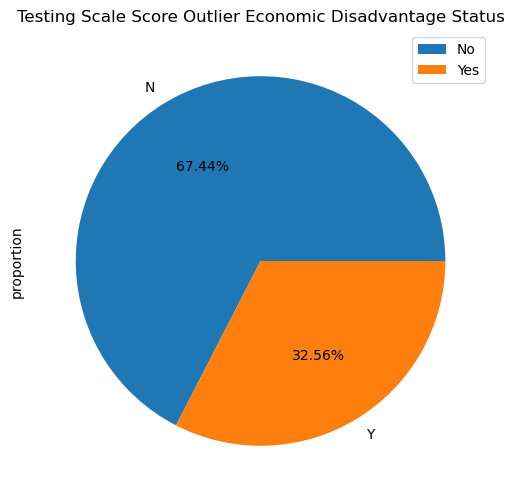

In [29]:
outliers['EconomicDisadvantageStatus'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.2f%%', figsize = (10,6))
plt.title('Testing Scale Score Outlier Economic Disadvantage Status')
plt.legend(['No','Yes'])
plt.show()

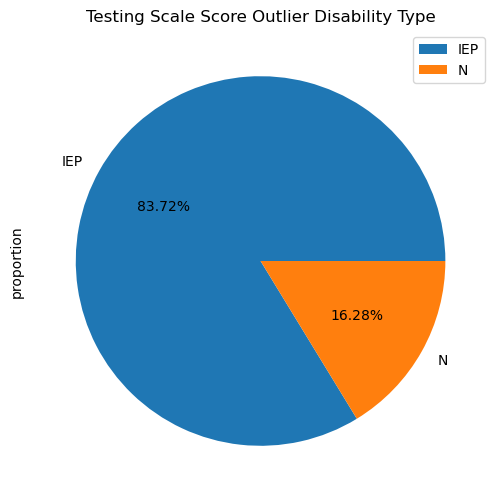

In [30]:
outliers['StudentWithDisabilities'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.2f%%', figsize = (10,6))
plt.title('Testing Scale Score Outlier Disability Type')
plt.legend()
plt.show()

In [31]:
values = outliers[outliers['StudentWithDisabilities']=='IEP']['PrimaryDisabilityType'].value_counts(normalize = True).to_list()


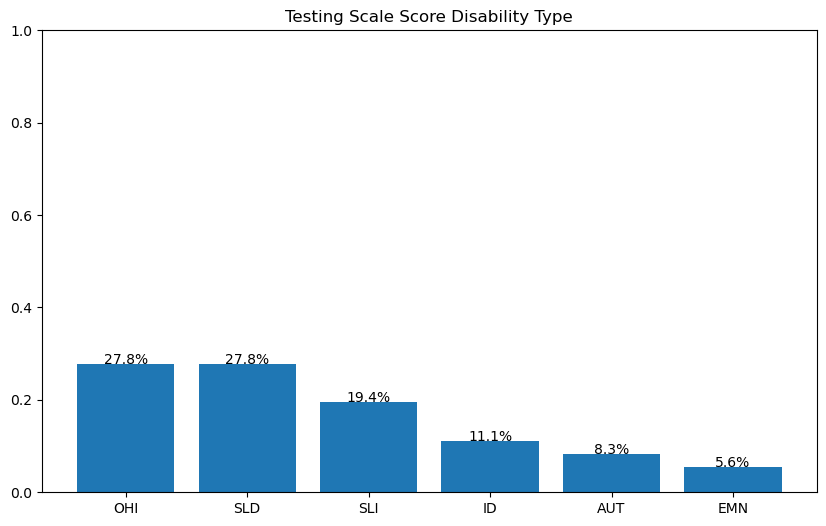

In [32]:
# creating data frame
dis_type = outliers[outliers['StudentWithDisabilities']=='IEP']['PrimaryDisabilityType'].value_counts(normalize = True).reset_index()

# plotting data
plt.figure(figsize = (10,6) )#--> creating figure
plt.bar( x = 'PrimaryDisabilityType', height = 'proportion', data = dis_type) #--> plotting bar graph

# applying labels
for i,v in enumerate(dis_type['proportion']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')
plt.ylim([0,1]) #--> y-axis scale

plt.title('Testing Scale Score Disability Type')

plt.show()

#### Test Scale Score Distribution by Race

In [33]:
# Typical Scale Score by Race
race_test_scale_score_distribution = df_ela.groupby('Race')['TestScaleScore'].median().reset_index()
race_test_scale_score_distribution.rename(columns = {'TestScaleScore':'Median Test Scale Score'}, inplace = True)

In [34]:
race_test_scale_score_distribution

,Race,Median Test Scale Score
0,Asian,793.0
1,Black,777.0
2,Hispanic,772.0
3,Multi,784.0
4,Native Hawaiian Or Other Pacific Islander,784.0
5,White,779.0


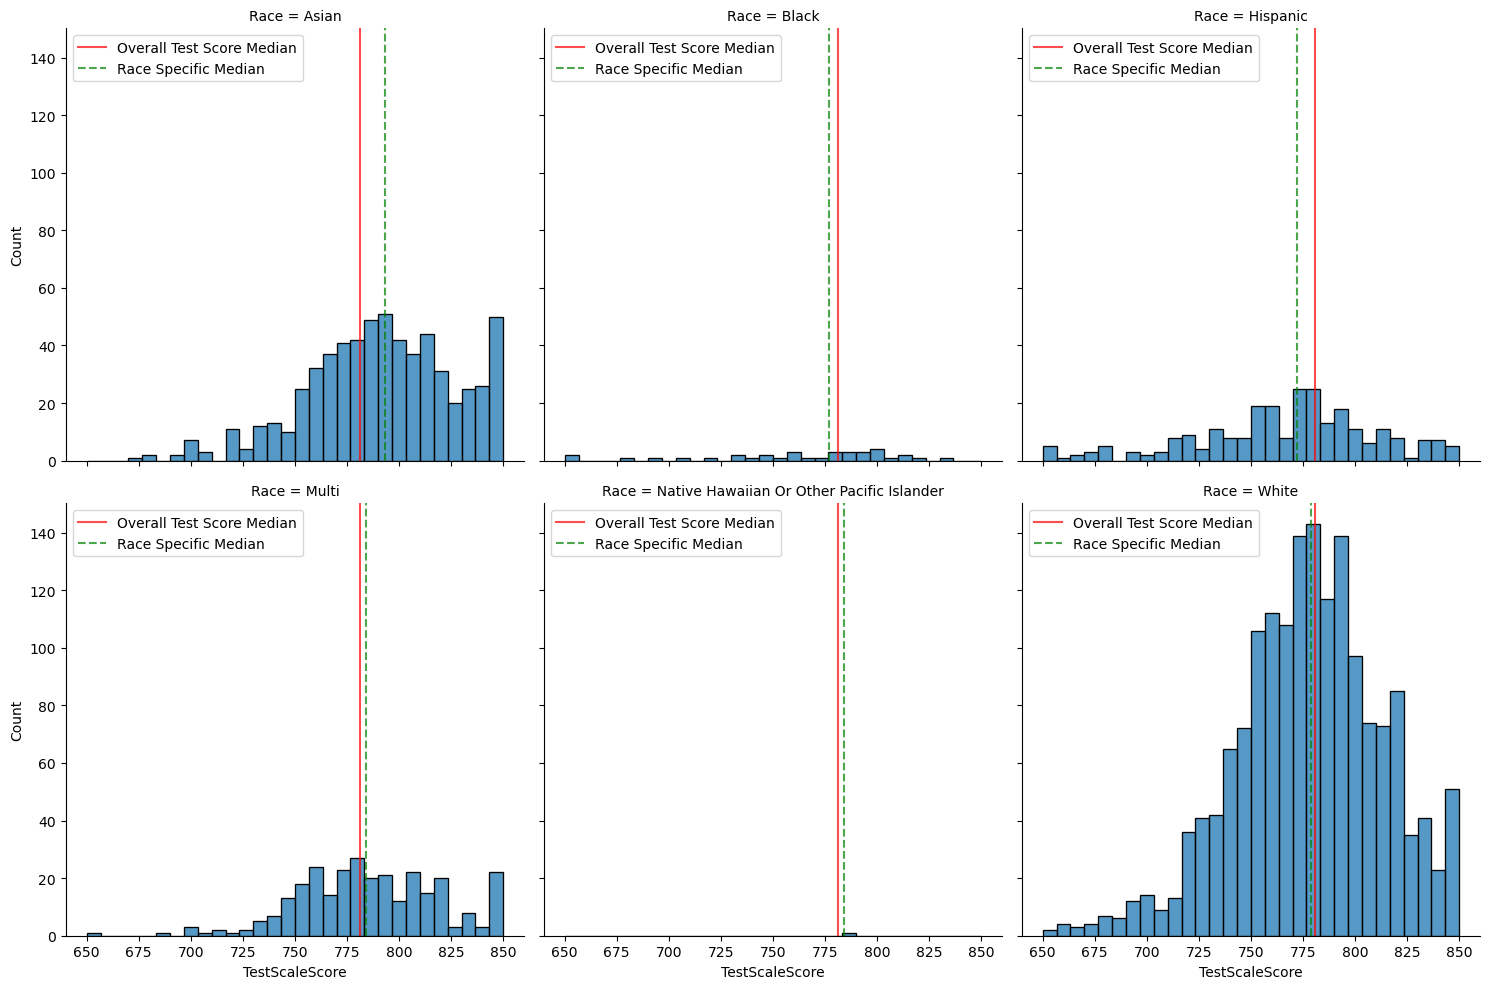

In [35]:
# Testing Scale Score Distribution by Race
df_ela = df_ela.sort_values(by = 'Race')

# creating plot object
plot = sns.displot(data = df_ela, x = 'TestScaleScore',col = 'Race',col_wrap = 3,kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)

# using for loop to plot the median by racial demographic on each plot
for i,race_median in enumerate(race_test_scale_score_distribution['Median Test Scale Score']):
        axes[i].axvline(x = race_median, color = 'green', linestyle = '--',alpha = .7, label = 'Race Specific Median')

for ax in axes:
    ax.legend(['Overall Test Score Median','Race Specific Median'])


plt.show()

In [36]:
print(f"The overall median scale score is {median}",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][0]} students is {race_test_scale_score_distribution['Median Test Scale Score'][0]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][0] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][1]} students is {race_test_scale_score_distribution['Median Test Scale Score'][1]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][1] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][2]} students is {race_test_scale_score_distribution['Median Test Scale Score'][2]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][2] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][3]} students is {race_test_scale_score_distribution['Median Test Scale Score'][3]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][3] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][4]} students is {race_test_scale_score_distribution['Median Test Scale Score'][4]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][4] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][5]} students is {race_test_scale_score_distribution['Median Test Scale Score'][5]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][5] - median} points")

The overall median scale score is 781.0 
The median scale score in ELA for Asian students is 793.0, a difference of 12.0 points 
The median scale score in ELA for Black students is 777.0, a difference of -4.0 points 
The median scale score in ELA for Hispanic students is 772.0, a difference of -9.0 points 
The median scale score in ELA for Multi students is 784.0, a difference of 3.0 points 
The median scale score in ELA for Native Hawaiian Or Other Pacific Islander students is 784.0, a difference of 3.0 points 
The median scale score in ELA for White students is 779.0, a difference of -2.0 points


In [37]:
iep_gen_comp = df_ela[(df_ela['StudentWithDisabilities'] == 'N')|(df_ela['StudentWithDisabilities'] == 'IEP')].groupby('StudentWithDisabilities')['TestScaleScore'].median().reset_index()
iep_gen_comp.rename(columns = {'TestScaleScore':'Median Test Scale Score'}, inplace = True)
iep_gen_comp = iep_gen_comp.sort_values(by = 'Median Test Scale Score', ascending = False).reset_index(drop = True)

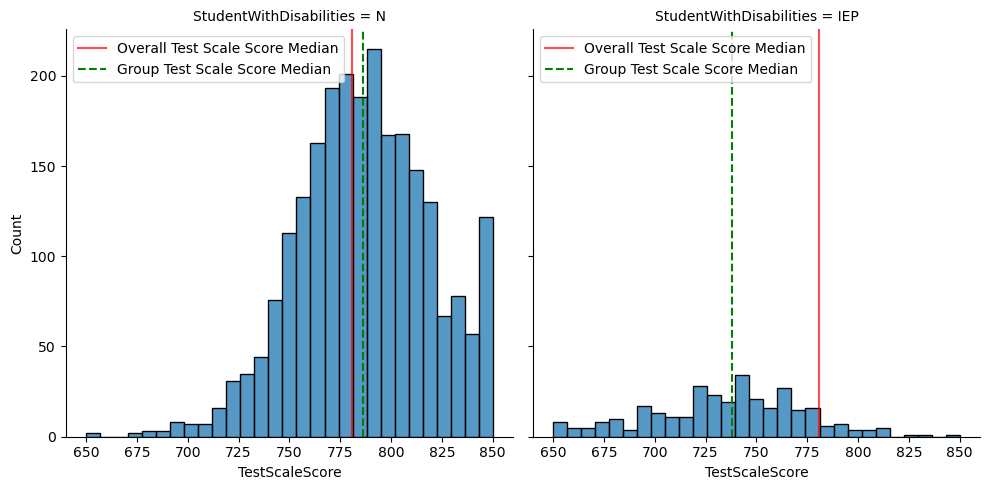

In [38]:
# Testing Scale Score Distribution by Disability

# creating plot object
plot = sns.displot(data = df_ela[(df_ela['StudentWithDisabilities'] == 'N')|(df_ela['StudentWithDisabilities'] == 'IEP')] , x = 'TestScaleScore',col = 'StudentWithDisabilities',col_wrap = 2,kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)
    ax.legend()

#using for loop to plot group median in each plot
for i, group_median in enumerate(iep_gen_comp['Median Test Scale Score']):
    axes[i].axvline(x = group_median, label = 'Group Test Scale Score Median', color = 'green',linestyle = '--')

for ax in axes:
    ax.legend(['Overall Test Scale Score Median','Group Test Scale Score Median'])

plt.show()

In [39]:
print(f"The overall median scale score for {subject} is {median}",
     f"\nThe median test scale score for General Education students in {subject} is {iep_gen_comp['Median Test Scale Score'][0]}, a difference of {iep_gen_comp['Median Test Scale Score'][0]-median}",
     f"\nThe median test scale score for IEP students in {subject} is {iep_gen_comp['Median Test Scale Score'][1]}, a difference of {iep_gen_comp['Median Test Scale Score'][1]-median}")

The overall median scale score for ELA is 781.0 
The median test scale score for General Education students in ELA is 786.0, a difference of 5.0 
The median test scale score for IEP students in ELA is 738.0, a difference of -43.0


## Economic Disadvantage

In [40]:
eco_dis = df_ela['EconomicDisadvantageStatus'].value_counts().reset_index()

In [41]:
eco_dis

,EconomicDisadvantageStatus,count
0,N,2814
1,Y,75


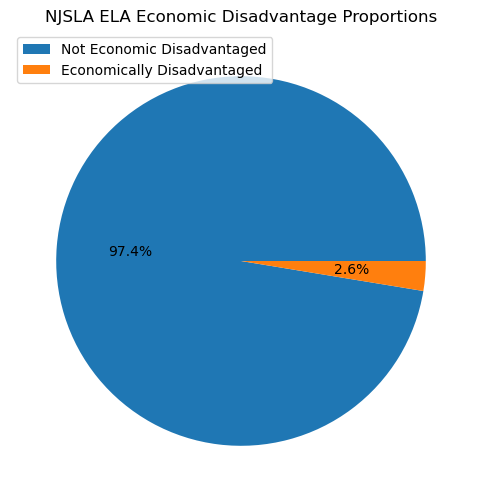

In [42]:
plt.figure(figsize = (10,6))
# plotting economic disadvantage proportion
plt.pie(x  = 'count', data = eco_dis, autopct = '%1.1f%%' )
plt.legend(['Not Economic Disadvantaged', 'Economically Disadvantaged'], loc = 'upper left')
plt.title(f'NJSLA {subject} Economic Disadvantage Proportions')
plt.show()

In [43]:
# proficiency by economic status
eco_dis_prof = df_ela.groupby('EconomicDisadvantageStatus')['proficient'].mean().reset_index()
eco_dis_prof

,EconomicDisadvantageStatus,proficient
0,N,0.831067
1,Y,0.440000


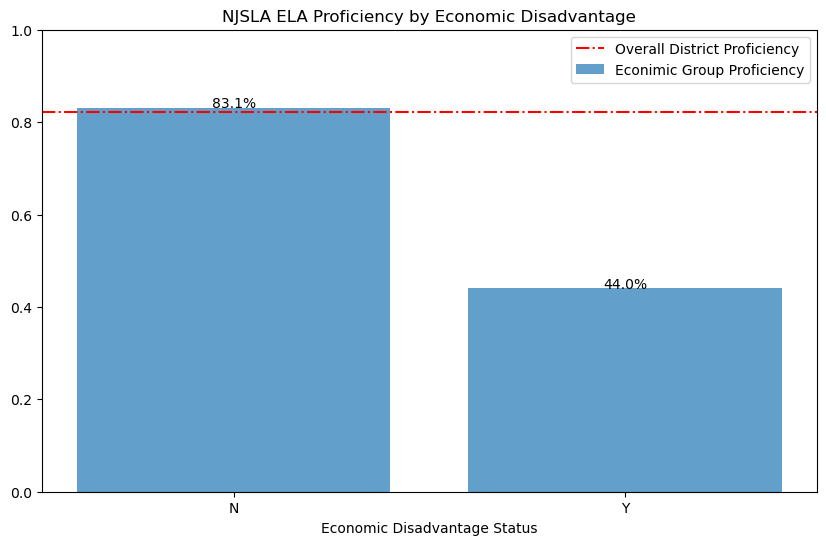

In [44]:
# creating proficiency object
ovr_prof = df_ela['proficient'].mean()

plt.figure(figsize = (10,6))

# plotting data
plt.bar(x = 'EconomicDisadvantageStatus', height = 'proficient', data = eco_dis_prof, alpha = .7)
plt.ylim(0,1)#--> setting y-axis limit

# labeling data
for i,v in enumerate(eco_dis_prof['proficient']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')

plt.axhline(y = ovr_prof, color = 'red', linestyle = '-.', label = 'Overall District Proficiency')

plt.xlabel('Economic Disadvantage Status')
plt.title(f"NJSLA {subject} Proficiency by Economic Disadvantage")
plt.legend(['Overall District Proficiency','Econimic Group Proficiency'])
plt.show()

In [45]:
print(f"Students who are not economically disadvantaged have a proficiency rate of {eco_dis_prof['proficient'][0]:.1%} in {subject}",
     f"\nStudents who are economically disadvantaged have a proficiency rate of {eco_dis_prof['proficient'][1]:.1%} in {subject}",
     f"\nThe difference between the two groups is 39.1 percentage points",
     f"\nAdditionally, there was a { (eco_dis_prof['proficient'][0]-eco_dis_prof['proficient'][1])/eco_dis_prof['proficient'][1]:.2%} increase in proficiency when observing outcomes in NJSLA {subject} of students that are economically disadvantaged compared to students that are not economically disadvantaged")

Students who are not economiclly disadvantaged have a proficiency rate of 83.1% in ELA 
Students who are economically disadvantaged have a proficiency rate of 44.0% in ELA 
The difference between the two groups is 39.1 percentage points 
Additonally, there was a 88.88% increase in proficiency when observing outcomes in NJSLA ELA of students that are economically disadvantaged compared to students that are not economically disadvantaged


In [46]:
df_ela[df_ela['EconomicDisadvantageStatus'] == 'Y']['Race'].value_counts()

Race
Hispanic    25
White       25
Asian       14
Black        8
Multi        3
Name: count, dtype: int64

### Economic Disadvantage Proficinecy

In [47]:
# Scale Score by Gender
eco_dis_median = df_ela.groupby('EconomicDisadvantageStatus')['TestScaleScore'].median().reset_index()
eco_dis_median.rename(columns={'TestScaleScore':'Median Test Scale Score'}, inplace = True)
eco_dis_median

,EconomicDisadvantageStatus,Median Test Scale Score
0,N,782.0
1,Y,734.0


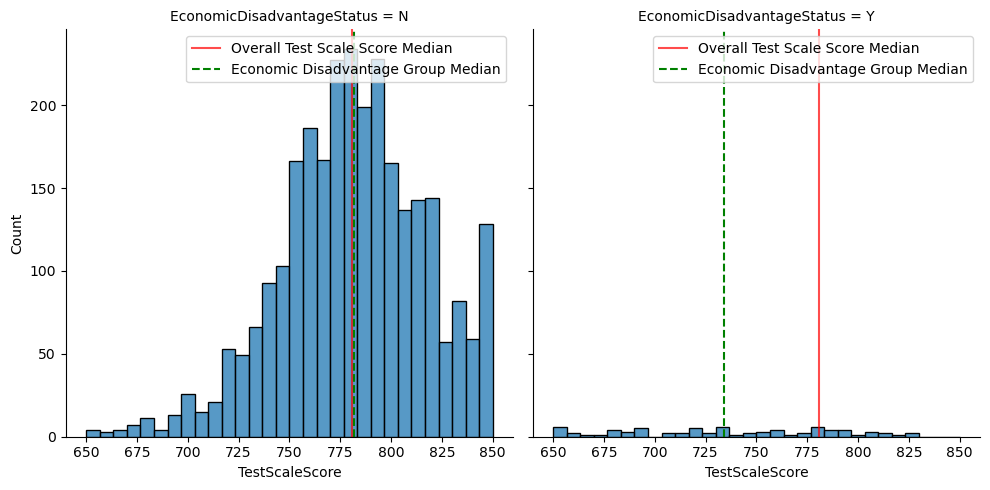

In [48]:
# Testing Scale Score Distribution by Economic Status

# creating plot object
plot = sns.displot(data = df_ela, x = 'TestScaleScore',col = 'EconomicDisadvantageStatus',kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)

# using for loop to plot the test scale median for each group
for i, eco_median in enumerate(eco_dis_median['Median Test Scale Score']):
    axes[i].axvline(x = eco_median, color = 'green', linestyle = '--')

#using for loop to create legend for each plot
for ax in axes:
    ax.legend(['Overall Test Scale Score Median','Economic Disadvantage Group Median'])

plt.show()

In [49]:
print(f"The overall median scale score for {subject} is {median}",
     f"\nThe median test scale score for students that are not economically disadvantaged in {subject} is {eco_dis_median['Median Test Scale Score'][0]}, a difference of {eco_dis_median['Median Test Scale Score'][0]-median} ",
     f"\nThe median test scale score for students that are economically disadvantaged in {subject} is {eco_dis_median['Median Test Scale Score'][1]}, a difference of {eco_dis_median['Median Test Scale Score'][1]-median}")

The overall median scale score for ELA is 781.0 
The median test scale score for students that are not economically disadvantaged in ELA is 782.0, a difference of 1.0  
The median test scale score for students that are economically disadvantaged in ELA is 734.0, a difference of -47.0
